<a href="https://colab.research.google.com/gist/mucsacso03/8d55849d3587e3396ef3952d9aa896ab/ner-with-bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [ ]:
!pip install transformers

In [ ]:
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.1.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.2.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.3.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.4.ner.tsv.gz

--2021-11-29 16:24:23--  http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.1.ner.tsv.gz
Resolving hlt.sztaki.hu (hlt.sztaki.hu)... 195.111.2.4
Connecting to hlt.sztaki.hu (hlt.sztaki.hu)|195.111.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42225789 (40M) [application/x-gzip]
Saving to: ‘huwiki.1.ner.tsv.gz’

huwiki.1.ner.tsv.gz 100%[===================>]  40.27M  9.87MB/s    in 4.6s    

2021-11-29 16:24:28 (8.83 MB/s) - ‘huwiki.1.ner.tsv.gz’ saved [42225789/42225789]

--2021-11-29 16:24:28--  http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.2.ner.tsv.gz
Resolving hlt.sztaki.hu (hlt.sztaki.hu)... 195.111.2.4
Connecting to hlt.sztaki.hu (hlt.sztaki.hu)|195.111.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28227004 (27M) [application/x-gzip]
Saving to: ‘huwiki.2.ner.tsv.gz’

huwiki.2.ner.tsv.gz 100%[===================>]  26.92M  8.50MB/s    in 3.2s    

2021-11-29 16:24:31 (8.50 MB/s) - ‘huwiki.2.ner.tsv.gz’ saved [28227004/2

In [ ]:
!gunzip huwiki.1.ner.tsv.gz
!gunzip huwiki.2.ner.tsv.gz
!gunzip huwiki.3.ner.tsv.gz
!gunzip huwiki.4.ner.tsv.gz

gzip: huwiki.1.ner.tsv already exists; do you wish to overwrite (y or n)? n
	not overwritten
gzip: huwiki.2.ner.tsv already exists; do you wish to overwrite (y or n)? n
	not overwritten
gzip: huwiki.3.ner.tsv already exists; do you wish to overwrite (y or n)? n
	not overwritten
gzip: huwiki.4.ner.tsv already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
import csv
import pandas as pd
from tqdm.auto import tqdm
sep = '\t'

csv.field_size_limit(100000000)

131072

In [ ]:
print('Reading data!')
tsv_file = open("huwiki.1.ner.tsv", encoding='utf-8')
data = tsv_file.read().split("\n")
tsv_file = open("huwiki.2.ner.tsv", encoding='utf-8')
data +=tsv_file.read().split("\n")
tsv_file = open("huwiki.3.ner.tsv", encoding='utf-8')
data += tsv_file.read().split("\n")
tsv_file = open("huwiki.4.ner.tsv", encoding='utf-8')
data += tsv_file.read().split("\n")
print('Reading data finished!')


# Making dataset
output = open('data.csv', 'w', encoding='utf-8')
i = 0
sentence = 0
read_tsv = []
print('Splitting rows!', len(read_tsv))
for row in tqdm(data):
    if len(row)==6 and row[0]=='"':
      print(row)
    else:
      read_tsv.append(row.split(sep))
print('Splitting rows finished!', len(read_tsv))

Reading data!
Reading data finished!
Splitting rows! 0


  0%|          | 0/7736673 [00:00<?, ?it/s]

Splitting rows finished! 7736673


In [ ]:
import os
print('Making output data!')
out = []
out_sentences = []
os.makedirs('./sentences', exist_ok=True)
file_count = 1
for row in tqdm(read_tsv):

    if len(row) == 6:
        output.write(str(i) + sep+sep+sep
                      + str(sentence) + sep+sep+sep
                      + row[0] + sep+sep+sep
                      + row[5] + '\n')
        i += 1
        out.append(row[0])
    elif len(row) == 1:
        sentence += 1
        out_sentences.append(' '.join(out))
        out = []
        if(sentence % 5000 == 0):
          with open(f'./sentences/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
           fp.write('\n'.join(out_sentences))
           out_sentences = []
           file_count += 1

with open(f'./sentences/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(out_sentences))
out_sentences = []
print('Making output data finished!', i, len(read_tsv))
output.close()
read_tsv = []

Making output data!


  0%|          | 0/7736673 [00:00<?, ?it/s]

Making output data finished! 7266903 7736673


In [ ]:
#from pathlib import Path
#paths = [str(x) for x in Path('./sentences').glob('**/*.txt')]
#paths[:5]

In [ ]:
data = pd.read_csv("data.csv", sep=sep+sep+sep, header=None, engine='python', encoding="UTF-8", error_bad_lines=False)

In [ ]:
data.rename(columns = {data.columns[0]: 'Index'},  inplace=True)
data.rename(columns = {data.columns[1]: 'Sentence'},  inplace=True)
data.rename(columns = {data.columns[2]: 'Word'},  inplace=True)
data.rename(columns = {data.columns[3]: 'Tag'},  inplace=True)

In [ ]:
tag_list=data.Tag.unique()
print(tag_list)
label_map = {label: i for i, label in enumerate(tag_list)}

num_labels = len(tag_list)
num_labels

['O' 'B-MISC' 'B-ORG' 'B-LOC' 'B-PER' 'I-PER' 'I-ORG' 'I-LOC' 'I-MISC']


9

In [ ]:
test=data[:40000]

In [ ]:
test[test['Word'].str.contains("\t")]

,Index,Sentence,Word,Tag


In [ ]:
data[data.index==853128]


,Index,Sentence,Word,Tag
853128,853128,51628,",",O


In [ ]:
data[data['Sentence']==57]

,Index,Sentence,Word,Tag
1160,1160,57,Az,O
1161,1161,57,ilyen,O
1162,1162,57,szoftvert,O
1163,1163,57,",",O
1164,1164,57,vagy,O
1165,1165,57,szoftvercsomagot,O
1166,1166,57,szokás,O
1167,1167,57,a,O
1168,1168,57,"""",O
1169,1169,57,bleeding-edge,O


In [ ]:
data[data['Sentence']==789]

,Index,Sentence,Word,Tag
14054,14054,789,Az,O
14055,14055,789,alkímiával,O
14056,14056,789,párhuzamosan,O
14057,14057,789,létezett,O
14058,14058,789,jatrokémia,O
14059,14059,789,(,O
14060,14060,789,iatrokémia,O
14061,14061,789,),O
14062,14062,789,is,O
14063,14063,789,",",O


In [ ]:
for row in tqdm(read_tsv):
    print(row)
    print(" ")
    print(len(row))
    print("-")
    i=i+1
    if i==100: 
      break 

0it [00:00, ?it/s]

# Data visualization

The following two figures show the distribution of tags and the distribution of entity types. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


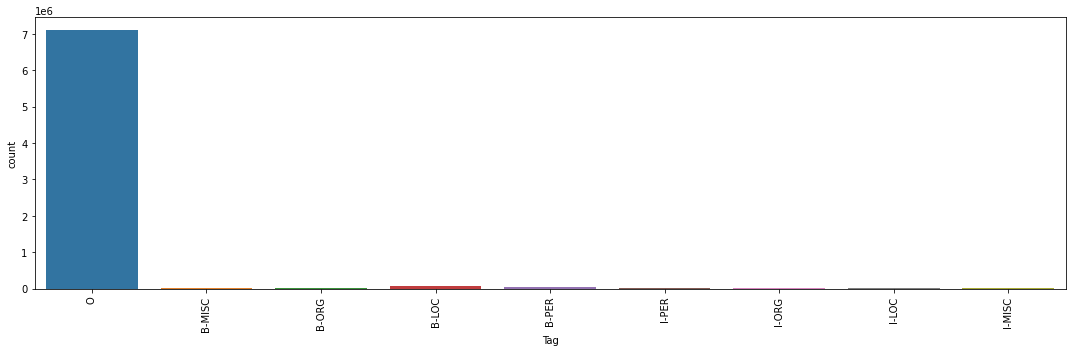

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


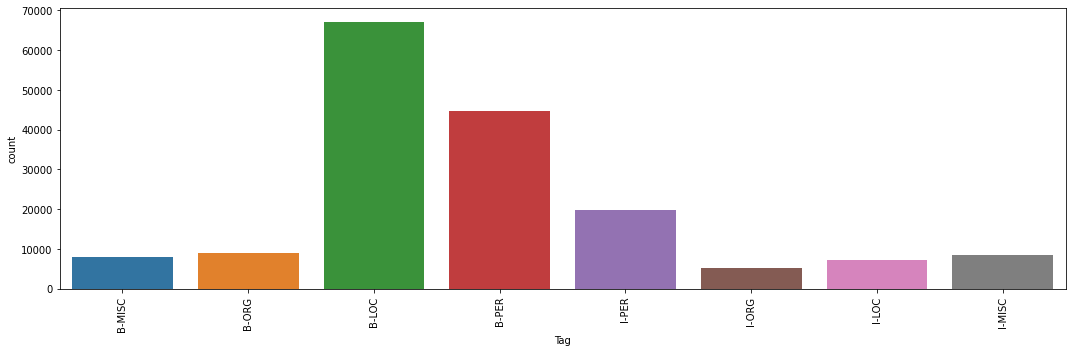

In [ ]:

plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data.loc[data['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# Splitting dataset into train, validation and test datasets

In [ ]:
nb_samples = len(data)
valid_split = 0.2
test_split = 0.1

X_train = data[0:int(nb_samples*(1-valid_split-test_split))]
X_valid = data[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
X_test  = data[int(nb_samples*(1-test_split)):]

print(len(data))
print(len(X_train))
print(len(X_test))
print(len(X_valid))
data = []

363345
254341
36335
72669


## Training the tokenizer

In [ ]:
from transformers import (
    TF2_WEIGHTS_NAME,
    BertConfig,
    BertTokenizer,
    TFBertForTokenClassification,
    create_optimizer)

In [ ]:
MODEL_CLASSES = {"bert": (BertConfig, TFBertForTokenClassification, BertTokenizer)}

In [ ]:
config_class, model_class, tokenizer_class = MODEL_CLASSES['bert']

In [ ]:
BERT_MODEL="bert-base-cased"

In [ ]:
config = config_class.from_pretrained(BERT_MODEL,num_labels=num_labels)

In [ ]:
tokenizer = tokenizer_class.from_pretrained(BERT_MODEL,do_lower_case=False)

In [ ]:
import tensorflow as tf

## Aggregating sentences and tags

In [ ]:
agg_func = lambda s: [ [w,t] for w,t in zip(s["Word"].values.tolist(),s["Tag"].values.tolist())]

In [ ]:
def isNaN(string):
    return string != string

In [ ]:
x_train_grouped = X_train.groupby("Sentence").apply(agg_func)
x_val_grouped = X_valid.groupby("Sentence").apply(agg_func)
x_test_grouped = X_test.groupby("Sentence").apply(agg_func)

In [ ]:
x_train_sentences = [[s[0] for s in sent] for sent in x_train_grouped.values]
x_val_sentences = [[s[0] for s in sent] for sent in x_val_grouped.values]
x_test_sentences = [[s[0] for s in sent] for sent in x_test_grouped.values]

In [ ]:
x_train_tags = [[t[1] for t in tag] for tag in x_train_grouped.values]
x_val_tags = [[t[1] for t in tag] for tag in x_val_grouped.values]
x_test_tags = [[t[1] for t in tag] for tag in x_test_grouped.values]

In [ ]:
X_train = []
X_valid = []
X_test = []

## Tokenizing the inputs

In [ ]:
from keras.preprocessing.sequence import pad_sequences
max_seq_length =128
pad_token_label_id = 0
def convert_to_input(sentences,tags):
  input_id_list,attention_mask_list,token_type_id_list=[],[],[]
  label_id_list=[]
  
  for x,y in tqdm(zip(sentences,tags),total=len(tags)):
    try:
      tokens = []
      label_ids = []

      for word, label in zip(x, y):
        if(isNaN(word)):
          word = 'nan'
        word_tokens = tokenizer.tokenize(word)
        tokens.extend(word_tokens)
        label_ids.extend([label_map[label]] + [pad_token_label_id] * (len(word_tokens) - 1))

    
      special_tokens_count =  2
      if len(tokens) > max_seq_length - special_tokens_count:
        tokens = tokens[: (max_seq_length - special_tokens_count)]
        label_ids = label_ids[: (max_seq_length - special_tokens_count)]

      label_ids = [pad_token_label_id]+label_ids+[pad_token_label_id]
      inputs = tokenizer.encode_plus(tokens,add_special_tokens=True, max_length=max_seq_length, truncation=True,is_split_into_words=True)

      input_ids, token_type_ids = inputs["input_ids"], inputs["token_type_ids"]
      attention_masks = [1] * len(input_ids)

      attention_mask_list.append(attention_masks)
      input_id_list.append(input_ids)
      token_type_id_list.append(token_type_ids)

      label_id_list.append(label_ids)
    except TypeError as e:
      print(x)
  return input_id_list,token_type_id_list,attention_mask_list,label_id_list


In [ ]:
input_ids_train,token_ids_train,attention_masks_train,label_ids_train=convert_to_input(x_train_sentences,x_train_tags)

  0%|          | 0/14434 [00:00<?, ?it/s]

In [ ]:
input_ids_val,token_ids_val,attention_masks_val,label_ids_val=convert_to_input(x_val_sentences,x_val_tags)

  0%|          | 0/4259 [00:00<?, ?it/s]

In [ ]:
input_ids_test,token_ids_test,attention_masks_test,label_ids_test=convert_to_input(x_test_sentences,x_test_tags)

  0%|          | 0/2364 [00:00<?, ?it/s]

In [ ]:
x_train_sentences,x_train_tags,x_val_sentences,x_val_tags,x_test_sentences,x_test_tags = [], [], [], [], [], []

## Padding inputs

In [ ]:
input_ids_train = pad_sequences(input_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
token_ids_train = pad_sequences(token_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
attention_masks_train = pad_sequences(attention_masks_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
label_ids_train = pad_sequences(label_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

In [ ]:
input_ids_val = pad_sequences(input_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
token_ids_val = pad_sequences(token_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
attention_masks_val = pad_sequences(attention_masks_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
label_ids_val = pad_sequences(label_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

In [ ]:
input_ids_test = pad_sequences(input_ids_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
token_ids_test = pad_sequences(token_ids_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
attention_masks_test = pad_sequences(attention_masks_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
label_ids_test = pad_sequences(label_ids_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

## Creating Tensorflow datasets

In [ ]:
def example_to_features(input_ids,attention_masks,token_type_ids,y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids},y

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((input_ids_train,attention_masks_train,token_ids_train,label_ids_train)).map(example_to_features).batch(128)

val_ds = tf.data.Dataset.from_tensor_slices((input_ids_val,attention_masks_val,token_ids_val,label_ids_val)).map(example_to_features).batch(128)

test_ds=tf.data.Dataset.from_tensor_slices((input_ids_test,attention_masks_test,token_ids_test,label_ids_test)).map(example_to_features)

In [ ]:
import pickle

In [ ]:
tf.data.experimental.save(
    train_ds, "tf_train_data", compression='GZIP'
)
with open("tf_train_data" + '/element_spec', 'wb') as out_:  # also save the element_spec to disk for future loading
    pickle.dump(train_ds.element_spec, out_)

tf.data.experimental.save(
    val_ds, "tf_val_data", compression='GZIP'
)
with open('tf_val_data' + '/element_spec', 'wb') as out_:  # also save the element_spec to disk for future loading
    pickle.dump(val_ds.element_spec, out_)

tf.data.experimental.save(
    test_ds, "tf_test_data", compression='GZIP'
)
with open('tf_test_data' + '/element_spec', 'wb') as out_:  # also save the element_spec to disk for future loading
    pickle.dump(test_ds.element_spec, out_)

In [ ]:
input_ids_train,attention_masks_train,token_ids_train,label_ids_train = [], [], [], []
input_ids_val,attention_masks_val,token_ids_val,label_ids_val = [], [], [], []
input_ids_test,attention_masks_test,token_ids_test,label_ids_test = [], [], [], []

In [ ]:
for x,y in test_ds.take(1):
  print(x,y)

# Train model

In [ ]:
model = model_class.from_pretrained(
                BERT_MODEL,
                from_pt=bool(".bin" in BERT_MODEL),
                config=config)

All model checkpoint layers were used when initializing TFBertForTokenClassification.

Some layers of TFBertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_token_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  107719680 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  6921      
                                                                 
Total params: 107,726,601
Trainable params: 107,726,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
history = model.fit(train_ds, epochs=1, validation_data=val_ds)

In [ ]:
model.save("bert-model")

# Evaluating the model

In [ ]:
import torch as torch
def valid(model, testing_loader):
    # put model in evaluation mode
    model.eval()
    
    eval_loss, eval_accuracy = 0, 0
    nb_eval_examples, nb_eval_steps = 0, 0
    eval_preds, eval_labels = [], []
    
    with torch.no_grad():
        for idx, batch in enumerate(testing_loader):
            #input_ids_val,attention_masks_val,token_ids_val,label_ids_val
            ids = batch['input_ids'].to(device, dtype = torch.long)
            mask = batch['attention_mask'].to(device, dtype = torch.long)
            labels = batch['label_ids_val'].to(device, dtype = torch.long)
            
            loss, eval_logits = model(input_ids=ids, attention_mask=mask, labels=labels)
            
            eval_loss += loss.item()

            nb_eval_steps += 1
            nb_eval_examples += labels.size(0)
        
            if idx % 50==0:
                loss_step = eval_loss/nb_eval_steps
                print(f"Validation loss per 100 evaluation steps: {loss_step}")
              
            # compute evaluation accuracy
            flattened_targets = labels.view(-1) # shape (batch_size * seq_len,)
            active_logits = eval_logits.view(-1, model.num_labels) # shape (batch_size * seq_len, num_labels)
            flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size * seq_len,)
            
            # only compute accuracy at active labels
            active_accuracy = labels.view(-1) != -100 
            # shape (batch_size, seq_len)
        
            labels = torch.masked_select(flattened_targets, active_accuracy)
            predictions = torch.masked_select(flattened_predictions, active_accuracy)
            
            eval_labels.extend(labels)
            eval_preds.extend(predictions)
            
            tmp_eval_accuracy = accuracy_score(labels.cpu().numpy(), predictions.cpu().numpy())
            eval_accuracy += tmp_eval_accuracy

    labels = [ids_to_labels[id.item()] for id in eval_labels]
    predictions = [ids_to_labels[id.item()] for id in eval_preds]
    
    eval_loss = eval_loss / nb_eval_steps
    eval_accuracy = eval_accuracy / nb_eval_steps
    print(f"Validation Loss: {eval_loss}")
    print(f"Validation Accuracy: {eval_accuracy}")

    return labels, predictions

In [ ]:
from torch.utils.data import Dataset, DataLoader 
testing_loader = DataLoader
VALID_BATCH_SIZE = 4
test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }
labels, predictions = valid(model, testing_loader)

In [ ]:
from seqeval.metrics import classification_report

print(classification_report(labels, predictions))